In [5]:
!pip install tensorflow

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf #provides the foundational framework for building and training our Neural Network.

In [15]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.info() #This helps identify which columns need cleaning or conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


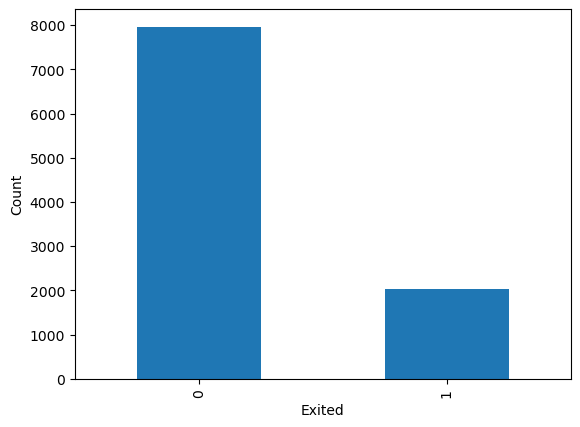

In [19]:
plt.xlabel('Exited')
plt.ylabel('Count') #sets label for xand y axis for visualiztion
df['Exited'].value_counts().plot.bar() #Target Distribution. Counts the number of customers who stayed (0) vs. those who exited (1)
plt.show()

In [21]:
 # data cleanng 
df['Geography'].value_counts() #Checks the distribution of the different countries

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [23]:
#One-Hot Encoding Uses the efficient Pandas get_dummies function to convert the categorical Geography column into three new binary columns (Geo_France, Geo_Spain, Geo_Germany).ensures the new columns are added horizontally.
df = pd.concat([df,pd.get_dummies(df['Geography'],prefix='Geo')],axis=1)

In [25]:
#Converts the Gender column ('Male', 'Female') into two new binary columns.
df = pd.concat([df,pd.get_dummies(df['Gender'])],axis=1)

In [27]:
df.info() #Prints the updated DataFrame summary,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Geo_France       10000 non-null  bool   
 15  Geo_Germany      10000 non-null  bool   
 16  Geo_Spain        10000 non-null  bool   
 17  Female       

In [29]:
df.drop(columns=['RowNumber','CustomerId','Surname','Geography','Gender'],inplace=True) #Column Removal. Permanently removes (inplace=True) all columns that are either non-predictiv

In [31]:
df.head() #Displays the final preprocessed feature set before splitting the data.

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


### Splitting Data

In [34]:
y = df['Exited'].values #Target Set (y). Defines the target variable (y)
x = df.loc[:,df.columns != 'Exited'].values #Defines the feature matrix (x) by selecting all columns except the Exited column.

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=20,test_size=0.25)

### Scaling Data

In [39]:
from sklearn.preprocessing import StandardScaler
std_x = StandardScaler() #initializes object
x_train = std_x.fit_transform(x_train) #The scaler fits the training data and then transforms it, standardizing the values (centered around 0).
x_test = std_x.transform(x_test) #The same transformation parameters (mean and standard deviation) learned from the training data are applied to the test se

In [ ]:
x_train.shape #rints the dimensions of the training feature set

### Tensorflow Model - Neural Network Classifier

In [41]:
import tensorflow as tf #This section builds and trains your primary Neural Network classifier using
from tensorflow.keras.layers import Dense,Conv1D,Flatten #Imports the necessary layer types from Kera
from tensorflow.keras.models import Sequential, Model #Imports the Sequential class, which allows you to stack layers one after the other.

In [43]:
model=Sequential() #Initializes the Sequential Neural Network model.
model.add(Flatten(input_shape=(13,))) #While Flatten is typically used for image data, here it serves to define the input shape of the tabular data (13 features).
model.add(Dense(100,activation='relu')) #dds a fully connected (Dense) hidden layer with 100 neurons
model.add(Dense(1,activation='sigmoid')) #Output Layer. Adds the final layer with one neuron (units=1) for binary classification.

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='BinaryCrossentropy') #Sets the parameters for training:

In [47]:
model.fit(x_train,y_train,batch_size=64,validation_split=0.1,epochs=100) #Feeds the data to the network.

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7862 - loss: 0.4892 - val_accuracy: 0.8187 - val_loss: 0.4189
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8083 - loss: 0.4288 - val_accuracy: 0.8267 - val_loss: 0.4007
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8200 - loss: 0.4128 - val_accuracy: 0.8373 - val_loss: 0.3817
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8317 - loss: 0.3972 - val_accuracy: 0.8480 - val_loss: 0.3662
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8394 - loss: 0.3818 - val_accuracy: 0.8693 - val_loss: 0.3515
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8450 - loss: 0.3702 - val_accuracy: 0.8667 - val_loss: 0.3397
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8507 - loss: 0.3618 - val_accuracy: 0.8747 - val_loss: 0.3280
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8508 - loss: 0.3567 - val_accu

In [49]:
pred = model.predict(x_test) #Keras Prediction. Generates the probability scores (between 0 and 1) for the unseen test set.

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [50]:
y_pred = []
for val in pred:
    if val > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
 #Thresholding. This loop manually converts the probability scores (pred) into hard binary predictions (y_pred). If the probability is greater than 0.5, it predicts 1 (Churn); otherwise, it predicts 0 (Stay).       

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [57]:
accuracy_score(y_test,y_pred) #prints the overall percentage of correct predictions made by the Keras model.
#his is the overall percentage of correct predictions the model made on the unseen test data.

0.8632

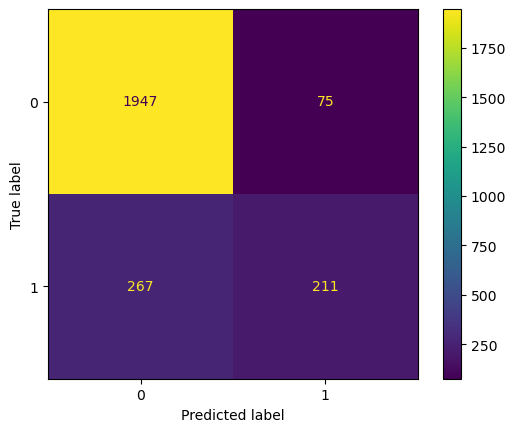

In [61]:
cm = confusion_matrix(y_test,y_pred) 
display = ConfusionMatrixDisplay(cm)
display.plot() #Calculates the raw numbers for the Confusion Matrix.
#True Negative (Top Left)-Correctly predicted Stayed
#False Positive (Top Right)-Incorrectly predicted Exited (The customer stayed, but the model incorrectly predicted 1).
#False Negative (Bottom Left)-Incorrectly predicted Stayed (The customer left, but the model incorrectly predicted 0).
#True Positive (Bottom Righ-Correctly predicted Exited (The customer left, and the model predicted 1).

In [63]:
from sklearn.neural_network import MLPClassifier

In [65]:
nn_classifier = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000,)
nn_classifier.fit(x_train,y_train) #Trains this second model on the same scaled training data.

MLPClassifier(activation='logistic', hidden_layer_sizes=100, max_iter=1000)

In [66]:
y_pred2 = nn_classifier.predict(x_test) #Generates the final binary predictions (0 or 1) for the test set using the MLP model.

In [67]:
accuracy_score(y_pred=y_pred2,y_true=y_test) #Calculates and prints the accuracy score for the Scikit-learn MLP mode

0.8644

In [68]:
nn_classifier.score(x_test,y_test)#equivalent to accuracy_score for classification, as a final verification.

0.8644